In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_classif


In [8]:
df = pd.read_csv('/content/drive/MyDrive/datassets/diamonds (cleaned).csv')
df


,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,5.85,6.89,4.25,7110,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,NaN,6.80,5.05,3.50,3050,GIA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,Pear,NaN,F,VS2,1.02,1.54,62.9,63.0,Excellent,Very Good,Thick to Very Thick,NaN,8.60,5.59,3.51,3760,GIA,Medium
6481,Heart,NaN,E,VVS2,1.00,1.16,58.3,59.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,6.05,6.99,4.07,4710,GIA,Strong
6482,Princess,Ideal,G,VVS1,1.03,1.01,72.6,71.0,Excellent,Excellent,Medium to Slightly Thick,NaN,5.59,5.51,4.00,3270,GIA,NaN
6483,Radiant,NaN,E,VS1,1.06,1.43,67.8,62.0,Excellent,Excellent,Slightly Thick to Thick,NaN,7.24,5.05,3.42,1050,GIA Lab-Grown,NaN


In [12]:
print(df.head())
print(df.tail())
print(df.isnull().sum)
print(df.duplicated().sum)

              Shape      Cut Color Clarity  Carat Weight  Length/Width Ratio  \
0  Cushion Modified    Ideal     F    VVS2          1.84                1.02   
1              Pear  Unknown     E     VS1          1.20                1.65   
2              Oval  Unknown     E     VS1          1.19                1.41   
3             Heart  Unknown     D      IF          1.00                1.18   
4           Radiant  Unknown     H     VS1          1.01                1.35   

   Depth %  Table %     Polish   Symmetry                        Girdle  \
0     65.8     59.0  Excellent  Very Good               Medium to Thick   
1     62.5     58.0  Very Good  Very Good               Medium to Thick   
2     63.1     63.0  Very Good  Very Good               Medium to Thick   
3     61.7     58.0  Excellent  Excellent  Slightly Thick to Very Thick   
4     69.4     66.0  Excellent  Very Good                         Thick   

     Culet  Length  Width  Height  Price           Type Fluorescence

In [14]:
# Summary Statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       Carat Weight  Length/Width Ratio      Depth %      Table %  \
count   6482.000000         6482.000000  6482.000000  6482.000000   
mean       1.235236            1.329637    64.207266    61.828139   
std        0.506083            0.325598     4.770686     4.754140   
min        1.000000            1.000000    46.100000    51.000000   
25%        1.010000            1.020000    61.200000    58.000000   
50%        1.030000            1.270000    63.100000    61.000000   
75%        1.190000            1.510000    67.600000    65.000000   
max        9.380000            2.580000    77.000000    78.000000   

            Length        Width       Height         Price    HighPrice  
count  6482.000000  6482.000000  6482.000000   6482.000000  6482.000000  
mean      7.662697     6.095872     3.884542   3529.458963     0.498920  
std       1.672428     1.148607     0.598200   3280.858597     0.500037  
min       5.180000     4.420000     2.670000   1010.000000    

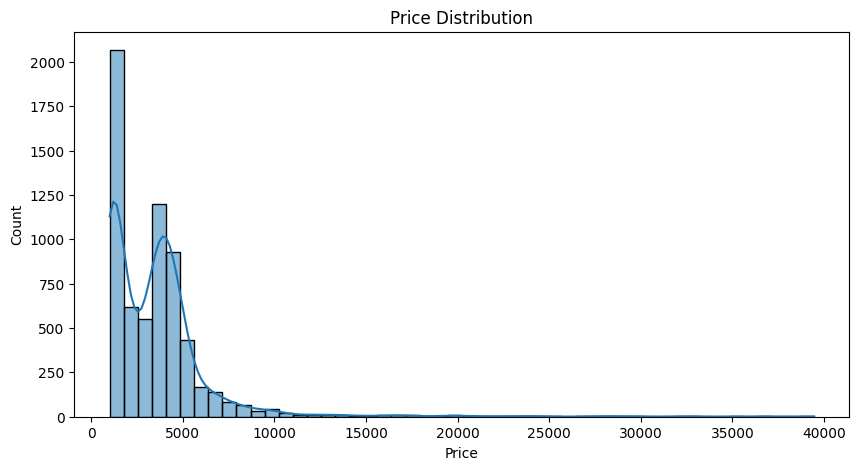

In [15]:
# Visualization
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [17]:
# Classification Task
print("\n--- Classification Task ---")
df['HighPrice'] = (df['Price'] > df['Price'].median()).astype(int)
features = ['Carat Weight', 'Depth %', 'Table %', 'Length', 'Width', 'Height']
X = df[features]
y = df['HighPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
print("Classification Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_log))
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log))

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Classification Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))

# Hyperparameter Tuning for Classification
param_grid_clf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search_clf = GridSearchCV(rf_clf, param_grid_clf, cv=5, scoring='accuracy')
grid_search_clf.fit(X_train, y_train)
print("Best Parameters for Random Forest Classifier:", grid_search_clf.best_params_)

# Feature Selection for Classification
selector_clf = SelectKBest(f_classif, k=3)
X_selected_clf = selector_clf.fit_transform(X, y)
print("Selected Features for Classification:", [features[i] for i in selector_clf.get_support(indices=True)])



--- Classification Task ---
Classification Accuracy (Logistic Regression): 0.5705474171164225
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.60      0.55      0.57       682
           1       0.54      0.59      0.57       615

    accuracy                           0.57      1297
   macro avg       0.57      0.57      0.57      1297
weighted avg       0.57      0.57      0.57      1297

Classification Accuracy (Random Forest): 0.8357748650732459
Best Parameters for Random Forest Classifier: {'max_depth': None, 'n_estimators': 100}
Selected Features for Classification: ['Carat Weight', 'Depth %', 'Width']


In [18]:
# Regression Task
print("\n--- Regression Task ---")
X_reg = df[features]
y_reg = df['Price']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_lin = lin_reg.predict(X_test_reg)
print("Linear Regression MSE:", mean_squared_error(y_test_reg, y_pred_lin))
print("Linear Regression R2 Score:", r2_score(y_test_reg, y_pred_lin))

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)
print("Random Forest Regression MSE:", mean_squared_error(y_test_reg, y_pred_rf_reg))

# Hyperparameter Tuning for Regression
param_grid_reg = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search_reg = GridSearchCV(rf_reg, param_grid_reg, cv=5, scoring='neg_mean_squared_error')
grid_search_reg.fit(X_train_reg, y_train_reg)
print("Best Parameters for Random Forest Regressor:", grid_search_reg.best_params_)

# Feature Selection for Regression
selector_reg = SelectKBest(f_classif, k=3)
X_selected_reg = selector_reg.fit_transform(X_reg, y_reg)
print("Selected Features for Regression:", [features[i] for i in selector_reg.get_support(indices=True)])



--- Regression Task ---
Linear Regression MSE: 8368613.964567745
Linear Regression R2 Score: 0.1795316017060189
Random Forest Regression MSE: 2374483.3468368775
Best Parameters for Random Forest Regressor: {'max_depth': 20, 'n_estimators': 50}
Selected Features for Regression: ['Carat Weight', 'Width', 'Height']


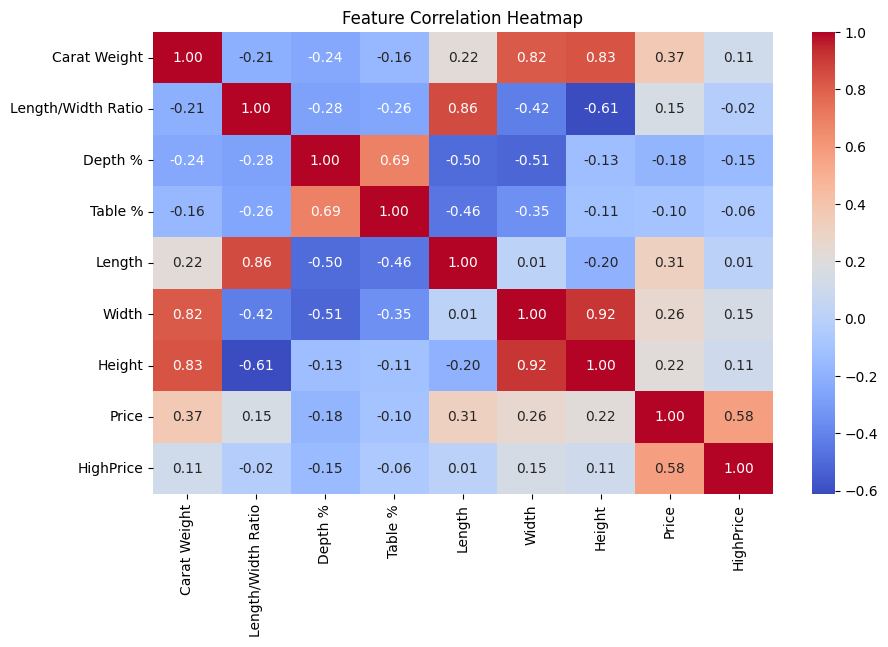

In [19]:
# 1. Heatmap - Correlation between numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

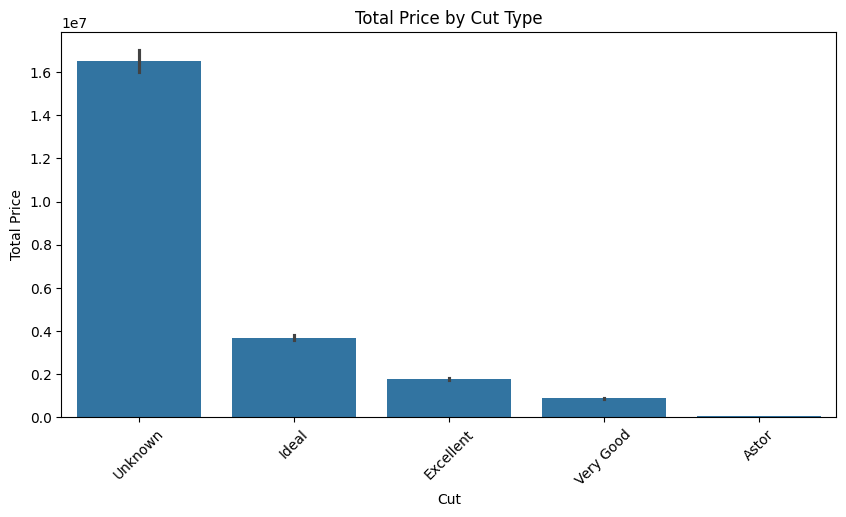

In [20]:
# 2. Bar Graph - Average Price by Cut
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Cut'], y=df['Price'], estimator=sum, order=df['Cut'].value_counts().index)
plt.title("Total Price by Cut Type")
plt.xlabel("Cut")
plt.ylabel("Total Price")
plt.xticks(rotation=45)
plt.show()

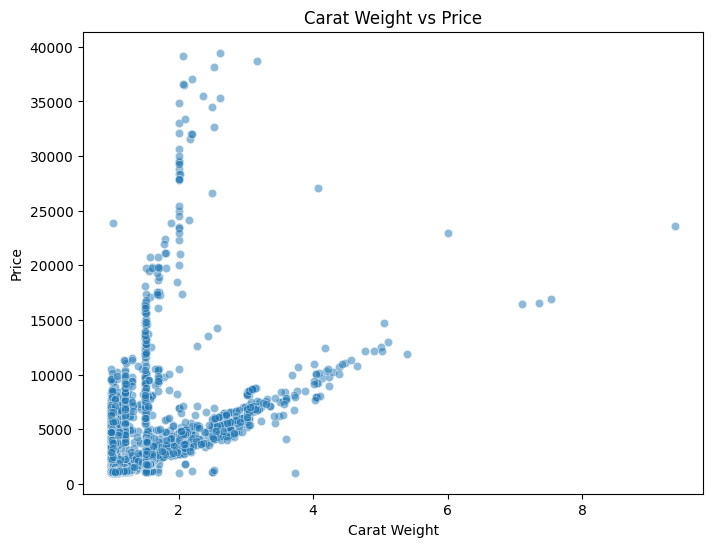

In [21]:
# 3. Scatter Plot - Carat Weight vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Carat Weight'], y=df['Price'], alpha=0.5)
plt.title("Carat Weight vs Price")
plt.xlabel("Carat Weight")
plt.ylabel("Price")
plt.show()